# Chapter: Feedforward Neural Networks


# Topic: FFNN modeling of quadratic function

In [1]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
# random number seed for result reproducibility 
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

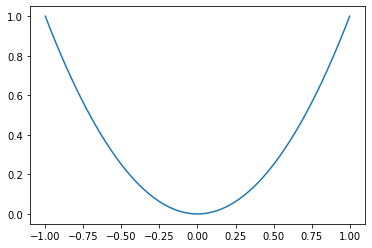

In [3]:
# generate data
x = np.linspace(-1,1,500)
y = x*x 
plt.plot(x,y)

In [4]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Define & Fit FFNN model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [5]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
# define model
n_nodes = 5

model = Sequential()
model.add(Dense(n_nodes, activation='relu', input_shape=(1,)))
model.add(Dense(1))

In [7]:
# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.05))

In [ ]:
# fit model
history = model.fit(x, y, epochs=400, batch_size=50)

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.show()

Epoch 1/400
10/10 [==============================] - 0s 598us/step - loss: 0.0510
Epoch 2/400
10/10 [==============================] - 0s 598us/step - loss: 0.0162
Epoch 3/400
10/10 [==============================] - 0s 598us/step - loss: 0.0055
Epoch 4/400
10/10 [==============================] - 0s 797us/step - loss: 0.0031
Epoch 5/400
10/10 [==============================] - 0s 499us/step - loss: 0.0018
Epoch 6/400
10/10 [==============================] - 0s 598us/step - loss: 0.0011
Epoch 7/400
10/10 [==============================] - 0s 499us/step - loss: 8.3774e-04
Epoch 8/400
10/10 [==============================] - 0s 598us/step - loss: 7.2750e-04
Epoch 9/400
10/10 [==============================] - 0s 499us/step - loss: 6.7577e-04
Epoch 10/400
10/10 [==============================] - 0s 499us/step - loss: 6.9621e-04
Epoch 11/400
10/10 [==============================] - 0s 598us/step - loss: 7.2265e-04
Epoch 12/400
10/10 [==============================] - 0s 598us/step - loss: 

In [ ]:
# predict y_test
y_pred = model.predict(x)

plt.figure()
plt.plot(x, y, '--b', label='y=x^2')
plt.plot(x, y_pred, '--r', label='Approximation')
plt.xlabel('x')
plt.title('y_pred vs y')
plt.legend()

plt.figure()
plt.plot(y_pred, 'r')
plt.title('y_pred')

In [ ]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, y_test_pred))

In [ ]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          inner layer activations
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
import tensorflow.keras.backend as K
activations = []
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    activations.append(keras_function(x))

In [ ]:
# plot activations
layer1_activations = activations[0][0]
for node in range(n_nodes):
    plt.figure()
    plt.plot(x, layer1_activations[:,node])
    plt.title('node ' + str(node+1) + ' activation')